### <center>Universidade Federal do Rio Grande do Norte<br>Programa de Pós-Graduação em Engenharia Elétrica e Computação<br>Module: Data Science (Tópicos Especiais F)<br>Professor Ivanovitch Silva

### <center> Students: Marianne Diniz / Taline Nóbrega

## <center> Project 4: Portal da Transparência

## 1. Introduction

This is a guided project focused on scrapping multiple web pages with Python using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) and [requests](http://docs.python-requests.org/en/master/). It was also performed some simple analysis using [pandas](http://pandas.pydata.org/), and [seaborn](https://seaborn.pydata.org/).

## 2. Objectives

This project aims to analyze the gender of all UFRN employees' name by web scraping the list presented on [Portal da Transparência](http://www.portaldatransparencia.gov.br/) website. Portal da Transparência is a Brazilian government portal dedicated to making public all expenditures of the federal government. It has a list of all expenses and money transfers the federal government has made. 
In order to classify the names into 'male' and 'female', it was suggested to use some applications/API/packages, which are discussed and presented in the following sections.

## 3. Code

### 3.1 Collecting the list of names using web scraping tools

The data used in this project was obtained from web scraping Portal da Transferência webpage. In order to satisfy the objectives, the page analyzed was that present the list of employees who work at UFRN (Universidade Federal do Rio Grande do Norte). Available on this [link](http://www.portaldatransparencia.gov.br/servidores/OrgaoExercicio-ListaServidores.asp?CodOrg=26243). This page provides a list of all UFRN's employees, which results in 6183 people. The employee's names are distributed in **413 pages**
This web scraping should result in a list of names. The following code pretends to do that.

In [5]:
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from time import time
from warnings import warn
from IPython.core.display import clear_output
from requests import get
import pandas as pd
import rpy2.robjects as robjects
import requests as requests
import matplotlib.pyplot as plt

In [ ]:
pages = [str(i) for i in range(1,414)] # number of pages - 413

# List to store the scraped data in
names = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For each page
for page in pages:
      
    #url 
    url = 'http://www.portaldatransparencia.gov.br/servidores/\
           OrgaoExercicio-ListaServidores.asp?CodOrg=26243&Pagina={}'.format(page).replace(" ", "")
        
    # Make a get request
    response = get(url)
        
    # Pause the loop
    #
    
    # Monitor the requests - Controlling the loop’s rate to avoid bombarding the server with requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
              
    # Throw a warning for non-200 status codes
    while response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        sleep(randint(5,10))
        response = request.get(url)
    
    sleep(randint(5,10))    
    html_soup = BeautifulSoup(response.text, 'html.parser')
    unit_table = html_soup.find_all('table')

    # the second one is the target
    unit_rows  = unit_table[1].find_all('tr')
    unit_rows = unit_rows[1:]
    
    # Extract data from individual ies rows
    for row in unit_rows:
        # employees' names
        name = row.find('a')
        if name is not None:
            name = name.text.strip()
            names.append(name)

In [ ]:
# Checking the data collected
web_scraping_df = pd.DataFrame({'UFRN_employees_name': names})
print(web_scraping_df.info())

In [ ]:
# Creating a csv file with the data collected 
web_scraping_df.to_csv('UFRN_employees_name.csv')

### 3.2 Defining the gender of the name

So, after web scraping Portal da Trasnparência website we have all UFRN employees name organized in a list of 6138 names. To verify which name corresponds to a female or male name, we need to use some tool. The activity proposed the following options. Each one has their specific advantage.

    - https://www.dicionariodenomesproprios.com.br/
    - https://gender-api.com/
    - https://pypi.python.org/pypi/Genderize
    - http://fmeireles.com/blog/rstats/genderbr-predizer-sexo

After analyzing all options, we decided to use the package called [genderBR](http://fmeireles.com/blog/rstats/genderbr-predizer-sexo) using [RStudio](https://anaconda.org/r/rstudio) application.

The genderBR package for R is useful to predict the sex of a person using their proper name. This prediction is based on [IBGE](https://www.ibge.gov.br) Census conducted in 2010 and it works as the following example: according to the Census the name João is mostly used by men in Brazil, so we are confident that all people named João are men. Therefore, we can consider the name João as a male name.

This method is replicable, based on public data and it is much faster than manual classification. Thus, it was our first choice to predict the gender of the names.

   ### 3.2.1 Using R with Jupyter [genderBR]
   
In order to use genderBR package it is necessary to run R in Jupyter.There are two general ways to get started on using R with Jupyter: by using a kernel or by setting up an R environment that has all the essential tools to get started on doing data science. These processes are described in this interesting [post](https://www.datacamp.com/community/blog/jupyter-notebook-r).

Basically, after installing all packages we installed RStudio through Anaconda and genderBR through RStudio console. Then, we were able to run R commands. 

To switch from Python to R, we downloaded the following package:

In [1]:
# it's necessary to import rpy2.robjects as robjects to load this package
%load_ext rpy2.ipython 

After that, we easily switched from Python to R with the **%R** magic command.

Loading genderBR package:

In [2]:
%%R
library(genderBR)

The genderBR package has a main function called **get_gender** that predicts the gender of a person based on their first name (with or without capital letters, accents and last names).

Using get_gender function to analyze the list of names that we got previously

In [ ]:
# Reading the csv file
UFRN_employess_name = pd.read_csv('UFRN_employees_name.csv')
# Renaming the columns 
UFRN_employess_name.columns = ['','Name']
# Creating a list to append the guessed gender
guessed_gender = [] 
i=0
for name in UFRN_employess_name.Name:
    gender = robjects.r.get_gender(name)
    gender = gender.r_repr()
    gender = gender.strip('\"')
    guessed_gender.append(gender) 

# Creating a new column named Gender
UFRN_employess_name ['Gender'] = 0
# Appending guessed_gender to the new column
UFRN_employess_name.Gender = guessed_gender

Analyzing the result obtained from get_gender function

In [ ]:
UFRN_employess_name

Verifying how many male and female the function get_gender returned

In [24]:
UFRN_employess_name.Gender.value_counts()

Male             3019
Female           2825
NA                252
NA_character_      87
Name: Gender, dtype: int64

The results were quite good. 3019 names were classified as male name and 2825 were considered a female name. Only 339 names did not receive any classification.

### 3.2.2 Using Gender API

In order to perform a better analysis and to reduce the quantity of names without classification, it was applied other classification method. From the options presented previously, we decided to use [Gender API](https://gender-api.com/). This API allows us to perform 500 requests per month by using a private server key. So, we could apply it to verify the 339 names without classification.

In [119]:
# Creating a list with all names without classification
names_NA = UFRN_employess_name[(UFRN_employess_name['Gender']=='NA')|(UFRN_employess_name['Gender']=='NA_character_')]

# Splitting the name. Gender API just recognize one name
first_name = []
for i in range (0,339):
    fn = names_NA.Name.iloc[i].split()[0]
    first_name.append(fn)

# Using Gender API to classify the names in first_name list    
# key = HQsGtBZeRMkTzqLEf
gender_api=[]
for n in first_name:
    r = requests.get('https://gender-api.com/get?name={}&country=BR&key=xHQsGtBZeRMkTzqLEf'.format(n)).json().get('gender')
    r = r.capitalize()
    gender_api.append(r)

# Associating the results obtained to names_NA
names_NA.Gender = gender_api

In [124]:
names_NA.Gender.value_counts()

Unknown    200
Male        72
Female      67
Name: Gender, dtype: int64

In [ ]:
# Aggregating the content of names_NA into our main dataframe UFRN_employess_name
names_NA = UFRN_employess_name[(UFRN_employess_name['Gender']=='NA')|(UFRN_employess_name['Gender']=='NA_character_')]

for i in range (0,6183):
    if (UFRN_employess_name.Gender.iloc[i] == 'NA')|(UFRN_employess_name.Gender.iloc[i] =='NA_character_'):
        gender_api = names_NA.Gender.loc[i]
        UFRN_employess_name.Gender.loc[i] = gender_api

In [178]:
UFRN_employess_name.Gender.value_counts()

Male       3091
Female     2892
Unknown     200
Name: Gender, dtype: int64

As a result, we reduced the number of unclassified names to 200 using Gender API. The names without classification is shown in the following cell.

In [180]:
names_unclassified = UFRN_employess_name[(UFRN_employess_name['Gender'] == 'Unknown')]
names_unclassified

,,Name,Gender
8,8,ACYNELLY DAFNE DA SILVA NUNES,Unknown
39,39,ADENYLZA FLAVIA ALVES DE PAIVA,Unknown
50,50,ADLAREG AUREA DA COSTA DUTRA,Unknown
129,129,AKALINE DANTAS DE ARAUJO,Unknown
142,142,ALBANYRA DOS SANTOS SOUZA,Unknown
269,269,ALTAIVA JALES COSTA SOUZA,Unknown
282,282,ALVESSENA ALVES DE OLIVEIRA,Unknown
288,288,ALZIVANY ALVES DE MOURA FERNANDES,Unknown
289,289,AMADJA HENRIQUE BORGES,Unknown
290,290,AMALUSIA OLIVEIRA BEZERRA DE ARAUJO,Unknown


### 4. Results and Conclusion

After using **genderBR** and **Gender API** to predict the gender of all UFRN employees'name, we got the following result:

- Male:       3091
- Female:     2892
- Unknown:     200

In order to have a better interpretation, we can analyze this result using the following graphs:

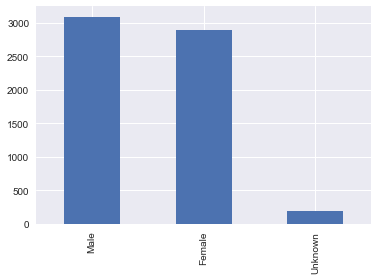

In [183]:
%matplotlib inline
UFRN_employess_name.Gender.value_counts().plot(kind='bar')


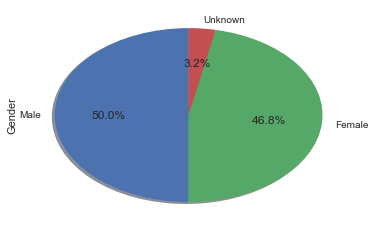

In [196]:
UFRN_employess_name.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)

The analysis shows that the number of women and men in the UFRN is quite proportional, even when we consider the percentage of names without classification.